# Iterable Datasets

In [1]:
import torch
import numpy as np
import sys
sys.path.append('/')
sys.path.append('..')
from torch.utils.data import DataLoader, Dataset, IterableDataset
import pytorch_lightning as pl
from prec_data.data import LorenzTLIterableDataset, LorenzTLVectorIterableDataModule#, LorenzTangentLinearVectorIterableDataModule
from prec_data.data_memmap import TangentLinearDataModuleMEMMAP, TangentLinearDatasetMEMMAP
import matplotlib.pyplot as plt
from DA_PoC.dynamical_systems.lorenz_numerical_model import LorenzWrapper


In [2]:
import os
os.getcwd()

'/home/sandbox_notebooks'

In [4]:
lorenz_it = LorenzTLIterableDataset(
    length=100,
    state_dimension=50,
    nvectors=5,
    burn=0,
    x0=None,
    nobs=10,
)

In [3]:
# from torchdata.datapipes.iter import IterableWrapper, Mapper
# from torch.utils.data.backward_compatibility import worker_init_fn

datamod = TangentLinearDataModuleMEMMAP(os.path.join(os.sep, "root", 'raw_data', 'data_100'),
                              nsamples=20_000,
                              dim=100,
                              window=10,
                              batch_size=2, num_workers=4, 
                              splitting_lengths=[0.8, 0.1, 0.1],
                              shuffling=True,
                              normalization=False)

In [5]:
datamod.setup(stage="validate")

In [21]:
datalod = datamod.test_dataloader()

In [23]:
datalod.dataset[0]

(tensor([-1.8530e+00,  3.0664e+00,  9.0136e+00,  3.8343e+00,  4.8942e+00,
          3.4041e+00, -8.0631e+00,  1.4301e+00,  1.0010e+00,  1.0977e+01,
          4.2750e+00,  1.8752e+00,  2.5917e+00,  6.6217e+00,  4.0738e+00,
          4.5276e+00,  7.8289e-01, -1.4838e+00,  5.7014e-01,  7.0029e+00,
          5.0307e+00, -6.6535e+00, -2.1521e+00, -4.1997e+00, -8.9005e-01,
          1.5708e+00,  3.9587e+00, -3.4759e+00,  5.7634e-01, -1.2309e+00,
          1.4582e+00, -7.1600e-01,  7.9612e+00,  4.9731e+00,  4.8675e-01,
          5.9509e+00,  8.3747e+00, -5.0981e+00, -5.5956e-01,  5.2679e+00,
          9.8653e-02, -3.7638e+00,  1.0554e+00, -5.8612e-01,  3.3051e+00,
          5.9535e+00, -3.5296e+00,  5.3908e+00,  4.6103e+00,  5.1880e+00,
          4.4123e+00, -2.7602e-01,  2.2021e+00, -1.7957e-01,  6.5920e+00,
          7.8530e+00, -7.2074e+00,  3.7599e+00,  2.7919e+00,  3.6425e-01,
          2.1019e+00,  8.5827e+00,  2.0885e+00, -2.3501e+00,  2.1591e+00,
          7.3630e+00, -4.0353e+00, -7.

In [9]:
state_test, _, tlm_test = datamod.test[0]

In [24]:
state_test

tensor([-1.8530e+00,  3.0664e+00,  9.0136e+00,  3.8343e+00,  4.8942e+00,
         3.4041e+00, -8.0631e+00,  1.4301e+00,  1.0010e+00,  1.0977e+01,
         4.2750e+00,  1.8752e+00,  2.5917e+00,  6.6217e+00,  4.0738e+00,
         4.5276e+00,  7.8289e-01, -1.4838e+00,  5.7014e-01,  7.0029e+00,
         5.0307e+00, -6.6535e+00, -2.1521e+00, -4.1997e+00, -8.9005e-01,
         1.5708e+00,  3.9587e+00, -3.4759e+00,  5.7634e-01, -1.2309e+00,
         1.4582e+00, -7.1600e-01,  7.9612e+00,  4.9731e+00,  4.8675e-01,
         5.9509e+00,  8.3747e+00, -5.0981e+00, -5.5956e-01,  5.2679e+00,
         9.8653e-02, -3.7638e+00,  1.0554e+00, -5.8612e-01,  3.3051e+00,
         5.9535e+00, -3.5296e+00,  5.3908e+00,  4.6103e+00,  5.1880e+00,
         4.4123e+00, -2.7602e-01,  2.2021e+00, -1.7957e-01,  6.5920e+00,
         7.8530e+00, -7.2074e+00,  3.7599e+00,  2.7919e+00,  3.6425e-01,
         2.1019e+00,  8.5827e+00,  2.0885e+00, -2.3501e+00,  2.1591e+00,
         7.3630e+00, -4.0353e+00, -7.2784e-01,  2.5

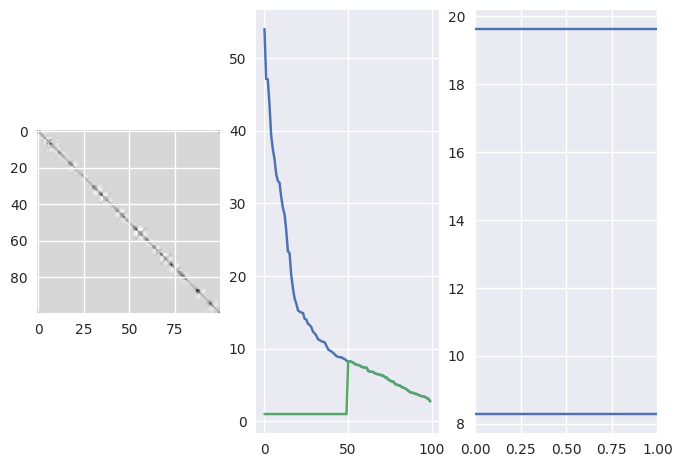

In [19]:
GN = tlm_test.T @ tlm_test
U, S, _ = torch.linalg.svd(GN)

def shift_eigvals(mat, U, S, r):
    return mat @ ((U[:, :r] @ ((S[:r]**(-1)-1) * U[:, :r]).T) + torch.eye(100))

GN_shift = shift_eigvals(GN, U, S, 50)
plt.subplot
plt.subplot(1, 3, 1)
plt.imshow(GN)
plt.subplot(1, 3, 2)
plt.plot(S)
plt.plot(torch.roll(torch.linalg.svd(GN_shift)[1], 50))
plt.subplot(1, 3, 3)
plt.axhline(y = torch.linalg.cond(GN))
plt.axhline(y = torch.linalg.cond(GN_shift))



In [18]:
len(i)
i[0].shape, i[1].shape

(torch.Size([2, 100]), torch.Size([2, 1000, 100]))

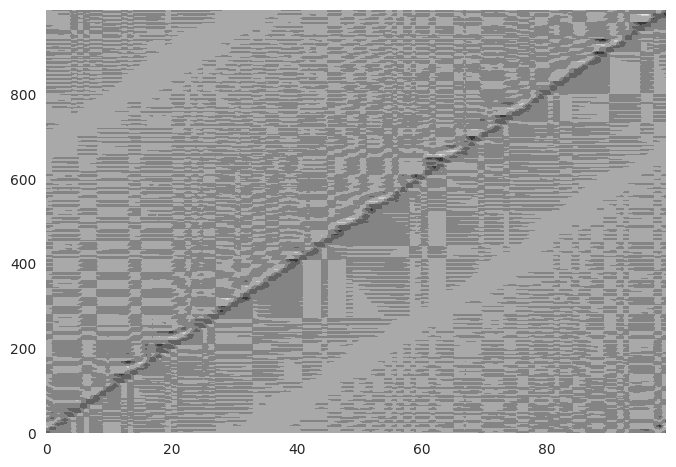

In [6]:
x0 = np.random.normal(size=40)
lorenz = LorenzWrapper(state_dimension=40)

In [ ]:
%%timeit
hist = lorenz.forward_steps(x0, 200)

In [ ]:
lorenz_it = LorenzTLIterableDataset(
    length=10,
    state_dimension=20,
    nvectors=5,
    burn=5,
    nobs=20,
    dummy=False,
    x0=None,
)

for i, j in enumerate(iter(lorenz_it)):
    print(i, j)

In [ ]:
dataload = DataLoader(lorenz_it, batch_size=10, num_workers=2)

In [ ]:
for x, dx, GtGdx in dataload:
    print(f"{x.shape=}, {dx.shape=}, {GtGdx.shape=}")
    break

In [ ]:
for el in dataload:
    break

In [ ]:
print(f"{x.shape=}, {dx.shape=}, {GtGdx.shape=}")

In [ ]:
x[0, :]